In [ ]:
# NumPy (import numpy as np):
# ------         --------
# NumPy is a powerful library for numerical operations in Python.
# It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.

# TensorFlow (import tensorflow as tf):
# ------            ------
# TensorFlow is an open-source machine learning framework developed by Google.
# It is widely used for building and training deep learning models.

# Keras (from keras import layers, Sequential, utils):
# -------         ------------
# Keras is a high-level neural networks API that runs on top of TensorFlow.
# The code imports specific components like layers, Sequential model, and utilities from the Keras library.

# os (import os):
# -----   -------
# The os module provides a way to interact with the operating system, allowing the script to perform operations like reading or writing files, manipulating paths, etc.

# Matplotlib (import matplotlib.pyplot as plt):
# ----------     -------------
# Matplotlib is a popular plotting library for Python.
# The code imports the pyplot module with the alias plt, which is commonly used for creating visualizations.

In [1]:
import numpy as np
import tensorflow as tf
from keras import layers, Sequential, utils
import os
import matplotlib.pyplot as plt

In [ ]:
# image_dataset_from_directory: This function is part of TensorFlow's Keras utilities and is used for creating a dataset of images from a directory. It automatically labels the images based on subdirectories.

# Arguments:

# "Images": This is the directory path where the images are located.

# validation_split=0.2: This parameter specifies the fraction of the data to reserve for validation. In this case, 20% of the data will be used for validation, and the remaining 80% will be used for training.

# subset="training": This parameter indicates that the dataset being created is for training. Alternatively, you could set it to "validation" to create a dataset for validation.

# seed=123: This is a seed for the random number generator, ensuring reproducibility. If you use the same seed, you should get the same split of training and validation data.

# image_size=(70, 70): This parameter specifies the target size for the images. Images will be resized to the specified dimensions during loading.

# batch_size=32: It defines the batch size for the dataset. The dataset will yield batches of 32 samples.

In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "Images",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(70, 70),
  batch_size=32)

Found 825 files belonging to 2 classes.
Using 660 files for training.


In [ ]:
# creating a validation dataset instead of a training dataset using the image_dataset_from_directory function from TensorFlow's Keras utilities.

# "Images": This is the directory path where the images are located.

# validation_split=0.2: This parameter specifies the fraction of the data to reserve for validation. In this case, 20% of the data will be used for validation.

# subset="validation": This parameter indicates that the dataset being created is for validation. The function will select a subset of the data for validation based on the split specified.

# seed=123: This is a seed for the random number generator, ensuring reproducibility. If you use the same seed, you should get the same split of training and validation data.

# image_size=(70, 70): This parameter specifies the target size for the images. Images will be resized to the specified dimensions during loading.

# batch_size=32: It defines the batch size for the dataset. The dataset will yield batches of 32 samples.

In [3]:
val_ds = utils.image_dataset_from_directory(
  "Images",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(70, 70),
  batch_size=32)

Found 825 files belonging to 2 classes.
Using 165 files for validation.


In [ ]:
# Using AUTOTUNE is beneficial because it allows TensorFlow to adapt the performance settings to the hardware and other conditions dynamically. This can lead to improved training speed and resource utilization.

# In summary, tf.data.AUTOTUNE is a way to automatically optimize the performance of TensorFlow's input pipeline operations by dynamically adjusting parameters based on the execution environment.

In [4]:
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
# train_ds.cache(): This line applies caching to the training dataset (train_ds). Caching stores the elements of the dataset in memory after they are loaded for the first epoch. This can significantly speed up subsequent epochs, especially if the dataset fits into memory.

# train_ds.prefetch(buffer_size=AUTOTUNE): This line applies prefetching to the training dataset. Prefetching is a technique where the data loading pipeline fetches batches of data in the background while the model is still training on the current batch.
# This helps to overlap the data loading and model training, reducing the overall training time.
# The buffer_size parameter determines how many batches to prefetch. In this case, it is set to AUTOTUNE, which means TensorFlow will dynamically adjust the buffer size based on available resources.

In [5]:
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
# This code defines a simple convolutional neural network (CNN) using the Keras Sequential API. Let's break down the layers and their meanings:
# -----------
# model = Sequential(): This creates a sequential model, which is a linear stack of layers. The layers are added in sequence, and the data flows sequentially through them.

# model.add(layers.Rescaling(1./255)): This layer rescales the input values by a factor of 1/255. It is often used to normalize pixel values in the range [0, 1].

# model.add(layers.Conv2D(70, (3, 3), activation='relu', input_shape=(70, 70, 3))): This is a 2D convolutional layer with 70 filters of size (3, 3), using the ReLU activation function. The input shape is specified as (70, 70, 3), indicating input images of size 70x70 pixels with three color channels (RGB).

# model.add(layers.MaxPooling2D((2, 2))): This layer performs max pooling with a pool size of (2, 2), reducing the spatial dimensions of the feature map.

# model.add(layers.Conv2D(140, (3, 3), activation='relu')): Another convolutional layer with 140 filters and ReLU activation.

# model.add(layers.MaxPooling2D((2, 2))): Another max pooling layer.

# model.add(layers.Conv2D(140, (3, 3), activation='relu')): Another convolutional layer with 140 filters and ReLU activation.

# model.add(layers.Flatten()): This layer flattens the output of the previous layer into a 1D array, preparing it for input to a densely connected layer.

# model.add(layers.Dense(70, activation='relu')): A densely connected layer with 70 neurons and ReLU activation.

# model.add(layers.Dense(2)): The final densely connected layer with 2 neurons, representing the output classes. It does not use an activation function, making it suitable for a classification task where the model is trained to output raw scores/logits, and the final activation (e.g., softmax) is applied during training or inference.

In [6]:
model = Sequential()
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(70, (3, 3), activation='relu', input_shape=(70, 70, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(140, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(140, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(70, activation='relu'))
model.add(layers.Dense(2))

In [ ]:
# The compile method in Keras is used to configure the model for training. It specifies the optimizer, loss function, and evaluation metrics that will be used during the training process. 
# Let's break down the provided compile statement:

# optimizer='adam': This sets the optimizer for the model. In this case, it uses the Adam optimizer, which is a popular optimization algorithm for training neural networks. Adam adapts the learning rates for each parameter during training.

# loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True): This specifies the loss function used during training. The chosen loss function is Sparse Categorical Crossentropy, which is commonly used for classification problems where the labels are integers (e.g., 0, 1, 2).
# The from_logits=True argument indicates that the model will output raw logits (unnormalized scores) instead of probabilities, and the softmax activation will be applied later during training.

# metrics=['accuracy']: This sets the evaluation metric(s) to be used during training and validation. In this case, the metric is accuracy, which is a common metric for classification problems. It measures the proportion of correctly classified samples.

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# checkpoint_path = "training_1/cp.ckpt": This line defines the file path for saving the checkpoint. In this case, the checkpoint file will be named cp.ckpt, and it will be saved in the directory training_1. The file extension .ckpt is often used for checkpoint files.

# checkpoint_dir = os.path.dirname(checkpoint_path): This line extracts the directory path from the checkpoint_path. The os.path.dirname() function is used to get the directory portion of the path. In this case, checkpoint_dir will be the string "training_1".

In [8]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


In [ ]:
# tf.keras.callbacks.ModelCheckpoint: This is a callback class provided by TensorFlow's Keras API. Callbacks are functions that can be applied at different stages of training (e.g., at the end of each epoch). ModelCheckpoint specifically saves the model's weights during training.

# filepath=checkpoint_path: This parameter specifies the path where the model weights will be saved. In this case, it's set to the checkpoint_path variable, which is the file path defined earlier ("training_1/cp.ckpt").

# save_weights_only=True: This parameter specifies that only the model weights should be saved, not the entire model. Setting it to True ensures that only the weights are stored, making it more space-efficient.

# verbose=1: This parameter controls the verbosity during saving. A value of 1 means it will print a message when a checkpoint is saved.

In [9]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [ ]:
# model.fit: This method is used to train the model. It takes training data (train_ds), specifies the number of epochs (30 in this case), and provides validation data (val_ds) for evaluating the model's performance on a separate dataset during training.

# epochs=30: This parameter specifies the number of times the model will iterate over the entire training dataset. In this case, the model will be trained for 30 epochs.

# validation_data=val_ds: This parameter provides the validation dataset (val_ds) to evaluate the model's performance on a separate set of data during training.

# callbacks=[cp_callback]: This parameter allows you to pass a list of callbacks to be applied during training. In this case, the ModelCheckpoint callback (cp_callback) is included. The model's weights will be saved at the end of each epoch due to this callback.

# history: The fit method returns a History object, which contains information about the training process. It typically includes training and validation loss values and any specified metrics over the epochs.

In [10]:
history = model.fit(train_ds, epochs=30, 
                    validation_data=val_ds,callbacks=[cp_callback])


Epoch 1/30


21/21 [==============================] - ETA: 0s - loss: 0.8097 - accuracy: 0.5970
Epoch 1: saving model to training_1\cp.ckpt
21/21 [==============================] - 5s 163ms/step - loss: 0.8097 - accuracy: 0.5970 - val_loss: 0.5980 - val_accuracy: 0.7333
Epoch 2/30
21/21 [==============================] - ETA: 0s - loss: 0.5624 - accuracy: 0.7000
Epoch 2: saving model to training_1\cp.ckpt
21/21 [==============================] - 3s 133ms/step - loss: 0.5624 - accuracy: 0.7000 - val_loss: 0.5181 - val_accuracy: 0.6727
Epoch 3/30
21/21 [==============================] - ETA: 0s - loss: 0.4699 - accuracy: 0.7576
Epoch 3: saving model to training_1\cp.ckpt
21/21 [==============================] - 3s 137ms/step - loss: 0.4699 - accuracy: 0.7576 - val_loss: 0.4776 - val_accuracy: 0.7394
Epoch 4/30
21/21 [==============================] - ETA: 0s - loss: 0.3810 - accuracy: 0.8182
Epoch 4: saving model to training_1\cp.ckpt
21/21 [==============================] - 3s 142ms/ste

Epoch 30/30
21/21 [==============================] - ETA: 0s - loss: 0.0262 - accuracy: 0.9909
Epoch 30: saving model to training_1\cp.ckpt
21/21 [==============================] - 4s 209ms/step - loss: 0.0262 - accuracy: 0.9909 - val_loss: 0.4963 - val_accuracy: 0.9030


In [ ]:
# plt.plot(history.history['accuracy'], label='accuracy'): This line plots the training accuracy over epochs. It uses the training history (history) obtained from the fit method and extracts the accuracy values for each epoch.

# plt.plot(history.history['val_accuracy'], label='val_accuracy'): This line plots the validation accuracy over epochs. Similar to the training accuracy, it extracts the validation accuracy values from the training history.

# plt.xlabel('Epoch'): Adds a label to the x-axis indicating the number of training epochs.

# plt.ylabel('Accuracy'): Adds a label to the y-axis indicating the accuracy.

# plt.ylim([0.5, 1]): Sets the y-axis limits to be between 0.5 and 1, providing a specific range for better visualization.

# plt.legend(loc='lower right'): Adds a legend to the plot indicating which line corresponds to training accuracy and which one corresponds to validation accuracy. The legend is placed in the lower right corner of the plot.

# plt.show(): Displays the plot.

# plt.savefig("model_accuracy.png"): Saves the plot as an image file named "model_accuracy.png". This line should come after plt.show() as savefig saves the current figure, and show would reset it.

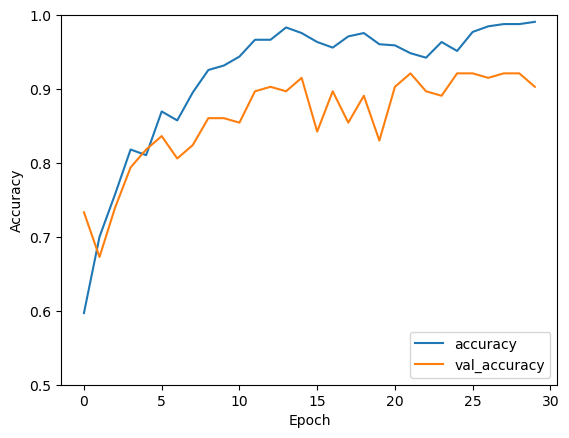

<Figure size 640x480 with 0 Axes>

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
plt.savefig("model_accuracy.png")

In [12]:

test_loss, test_acc = model.evaluate(val_ds, verbose=2)
print(test_acc)

6/6 - 0s - loss: 0.4963 - accuracy: 0.9030 - 193ms/epoch - 32ms/step
0.903030276298523


In [13]:
model.save("model.h5")

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
